In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu', name='layer_1'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax')
])

In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
layer_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [51]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape=(28,28,1)), #input_shape = (shape of sample). in this case shape = (60000,28,28)
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax') #Output layer with units equal to the number of classes. in this case y_train/y_test have 10 possible categories (0-9) for the images
])


In [7]:
# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [53]:
# Define the model optimizer, loss function and metrics

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()


model.compile(optimizer=opt, #equivalente a 'adam'
             loss='sparse_categorical_crossentropy',
             metrics=[acc,mae])


In [9]:
# Print the resulting model attributes
print(model.loss)
print(model.optimizer)
print(model.metrics)

sparse_categorical_crossentropy
[<tensorflow.python.keras.metrics.SparseCategoricalAccuracy object at 0x7ff698157be0>, <tensorflow.python.keras.metrics.MeanAbsoluteError object at 0x7ff6981572b0>]


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [29]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [33]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

In [46]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[11]) #9 means it is an Ankle boot

9


In [35]:
# Rescale the image values so that they lie in between 0 and 1.

train_images = train_images / 255.
test_images = test_images / 255.

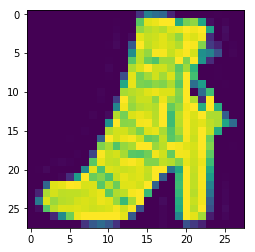

label: Ankle boot


In [47]:
# Display one of the images
i=11
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

#### Fit the model

In [62]:
# Fit the model

history = model.fit(train_images[...,np.newaxis], train_labels, epochs=8, batch_size=256)

Train on 60000 samples
Epoch 1/8
60000/60000 [==============================] - 49s 810us/sample - loss: 0.3249 - sparse_categorical_accuracy: 0.8843 - mean_absolute_error: 4.4200
Epoch 2/8
60000/60000 [==============================] - 48s 797us/sample - loss: 0.3142 - sparse_categorical_accuracy: 0.8876 - mean_absolute_error: 4.4200
Epoch 3/8
60000/60000 [==============================] - 48s 802us/sample - loss: 0.3014 - sparse_categorical_accuracy: 0.8928 - mean_absolute_error: 4.4200
Epoch 4/8
60000/60000 [==============================] - 50s 833us/sample - loss: 0.2941 - sparse_categorical_accuracy: 0.8944 - mean_absolute_error: 4.4200
Epoch 5/8
60000/60000 [==============================] - 50s 837us/sample - loss: 0.2872 - sparse_categorical_accuracy: 0.8970 - mean_absolute_error: 4.4200
Epoch 6/8
60000/60000 [==============================] - 50s 825us/sample - loss: 0.2815 - sparse_categorical_accuracy: 0.8992 - mean_absolute_error: 4.4200
Epoch 7/8
60000/60000 [============

#### Plot training history

In [63]:
# Load the history into a pandas Dataframe

df = pd.DataFrame(history.history)
df.head()

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.324946,0.884317,4.420001
1,0.314233,0.887583,4.420000
2,0.301433,0.892817,4.420001
3,0.294063,0.894367,4.420002
4,0.287201,0.896950,4.420001


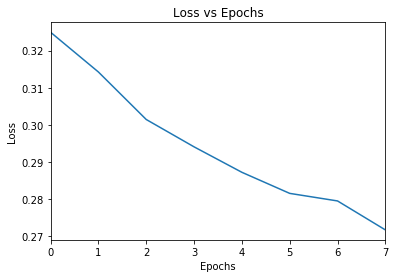

In [64]:
# Make a plot for the loss

loss_plot = df.plot(y='loss', title = 'Loss vs Epochs', legend=False)
loss_plot.set(xlabel='Epochs', ylabel='Loss')
plt.show()

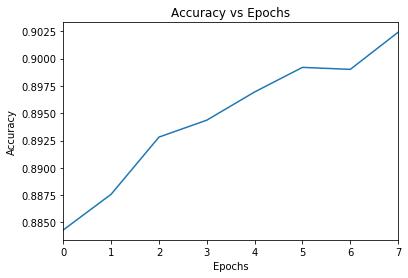

In [65]:
# Make a plot for the accuracy

acc_plot = df.plot(y='sparse_categorical_accuracy', title = 'Accuracy vs Epochs', legend=False)
acc_plot.set(xlabel='Epochs', ylabel='Accuracy')
plt.show()


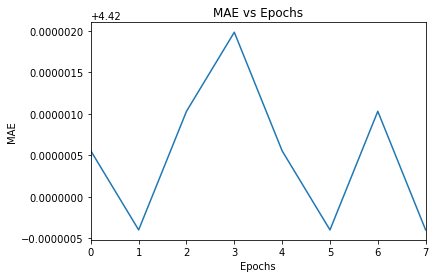

In [66]:
# Make a plot for the additional metric

mae_plot = df.plot(y='mean_absolute_error', title = 'MAE vs Epochs', legend=False)
mae_plot.set(xlabel='Epochs', ylabel='MAE')
plt.show()


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [67]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [77]:
# Evaluate the model

test_loss, test_accuracy, test_mae = model.evaluate(test_images[...,np.newaxis], test_labels, verbose=2)

10000/1 - 5s - loss: 0.2852 - sparse_categorical_accuracy: 0.8902 - mean_absolute_error: 4.4200


#### Make predictions from the model

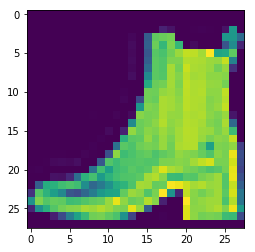

Label: Ankle boot


In [100]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [101]:
# Get the model predictions

predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction:{labels[np.argmax(predictions)]}")

Model prediction:Ankle boot


In [120]:
#predict the whole testing set
predictions = model.predict(test_images[...,np.newaxis])
predictions.shape

(10000, 10)

In [141]:
#convert prediction output into predicted labels
pred_labels = list(map(np.argmax,predictions))
pred_labels[0:5]

TypeError: list indices must be integers or slices, not function

#### Results

In [142]:
# Test labels vs predicted labels for testing set

results_df = pd.DataFrame(data={'Test labels':test_labels, 'Predicted labels':pred_labels})
results_df.head()

,Test labels,Predicted labels
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


In [143]:
print("Test Loss:",test_loss)
print("Test Accuracy:", test_accuracy)
print("Test MAE:", test_mae)

Test Loss: 0.3166848386704922
Test Accuracy: 0.8902
Test MAE: 4.419997
